In [10]:
import sys
sys.path.append("C:/Users/Maisha/Dropbox/MB_dev/Python/python_gss")

from csv_to_dataframe import *
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

dataf = get_gss()

In [36]:
'''Across all years (taken all together) what was the 
numeric average number of siblings (sibs) that a respondent had? 
'''
smallsibs1 = dataf[dataf['sibs']<98]
smallsibs2 = smallsibs1[smallsibs1['sibs']>=0]
ave = sum(smallsibs2['sibs'])/len(smallsibs2['sibs'])
sd = np.std(smallsibs2['sibs'])
print("Average sibs = "+str(ave)+", standard dev = "+str(sd))

Average sibs = 3.71570184915, standard dev = 3.154925061379272


In [38]:
iaps = dataf[dataf['year']==2006]
nuiaps = len(iaps[iaps['sibs']<0]['sibs'])
nuiaps

1518

In [ ]:
'''Across all years (taken all together) what was the numeric average number of children (childs) 
that a respondent had? '''

In [41]:
smallchilds = dataf[dataf['childs']<9]
ave = sum(smallchilds['childs'])/len(smallchilds['childs'])
sd = np.std(smallchilds['childs'])
print("Average childs = "+str(ave)+", standard dev = "+str(sd))

Average childs = 1.85162503032, standard dev = 1.674684284833455


In [40]:
dataf[dataf['childs']<8]['childs']

Series([], Name: childs, dtype: int64)

In [58]:
smallchilds = dataf.query('childs<sibs and sibs<8')
len(smallchilds)

17363

In [ ]:
'''In 1994, what was the numeric average number of siblings (sibs) that a respondent had? 
What was it in 2016?'''

In [69]:
x1 = dataf[dataf['sibs']<98]
x2 = x1[x1['sibs']>=0]
x94 = x2.query('year==1994')
x16 = x2.query('year==2016')
ave94 = sum(x94['sibs'])/len(x94['sibs'])
ave16 = sum(x16['sibs'])/len(x16['sibs'])
print(ave94, ave16)

3.71821536397 3.71837875611


In [64]:
x1zero = dataf[dataf['sibs']==0]
x94 = len(x1zero.query('year==1994'))
x16 = len(x1zero.query('year==2016'))
all94 = len(dataf.query('year==1994 and sibs>=0 and sibs<98'))
all16 = len(dataf.query('year==2016 and sibs>=0 and sibs<98'))
perc94 = x94/all94
perc16 = x16/all16
print(perc94, perc16)

0.05434417980543442 0.045422781271837874


In [66]:
'''In 1994, what was the numeric average number of children (childs) that a respondent had? What was it in 2016?'''

'In 1994, what was the numeric average number of children (childs) that a respondent had? What was it in 2016?'

In [85]:
def children(y1, y2):
    x1 = dataf[dataf['childs']<9]
    x2 = x1[x1['childs']>=0]
    x94 = x2.query('year=={}'.format(y1))
    x16 = x2.query('year=={}'.format(y2))
    ave94 = sum(x94['childs'])/len(x94['childs'])
    ave16 = sum(x16['childs'])/len(x16['childs'])
    print(ave94, ave16)
    
children(1994,2016)

1.8588669125 1.85204616999


In [73]:
'''Make a scatter plot in which the X axis is the number 
of children (childs), and the Y axis is the number of 
siblings (sibs).  There will be 30,000+ points on this graph.  
Visually, does it seem like there is a relationship?'''

'Make a scatter plot in which the X axis is the number \nof children (childs), and the Y axis is the number of \nsiblings (sibs).  There will be 30,000+ points on this graph.  \nVisually, does it seem like there is a relationship?'

In [103]:
dfcs = dataf.query('childs<9 and 0<=sibs<8')
dfcs.columns

Index(['ballot', 'chldidel', 'kidssol', 'parsol', 'wksubs', 'wksub', 'satjob',
       'workhard', 'thnkself', 'confed', 'coneduc', 'confinan', 'hapmar',
       'happy', 'bible', 'spanking', 'letdie1', 'fear', 'zodiac', 'dwelown',
       'realrinc', 'realinc', 'partners', 'marhomo', 'letin', 'discaff',
       'marblk', 'helpnot', 'helppoor', 'fefam', 'tvhours', 'news', 'relig16',
       'pray', 'speduc', 'maeduc', 'paeduc', 'educ', 'agekdbrn', 'age',
       'childs', 'sibs', 'spwrksta', 'marital', 'hrs2', 'hrs1', 'wrkstat',
       'id_', 'sex', 'race', 'res16', 'relig', 'grass', 'gunlaw', 'cappun',
       'tax', 'eqwlth', 'nateduc', 'natdrug', 'natcrime', 'natenvir',
       'polviews', 'partyid', 'born', 'reg16', 'year'],
      dtype='object')

In [164]:
#dataf.spanking.unique()
colors = {'1':'red', '2':'orange', '3':'turquoise', '4':'blue', '8':'white', '9':'white', '0':'white'}
#sp_color = map( lambda x : colors[x], dataf.spanking )
sp_color = dataf['spanking'].apply(lambda x : colors[str(x)])
#print(list(sp_color))

In [174]:
type(sp_color)

pandas.core.series.Series

Axes(0.125,0.125;0.775x0.755) Axes(0.125,0.125;0.775x0.755)


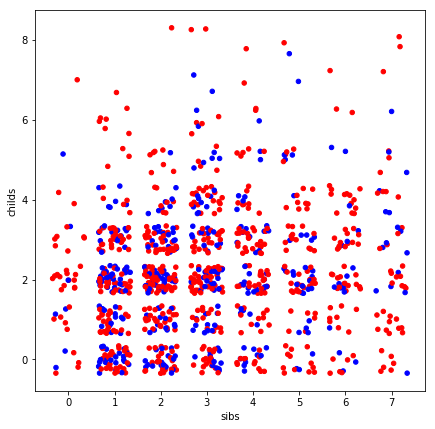

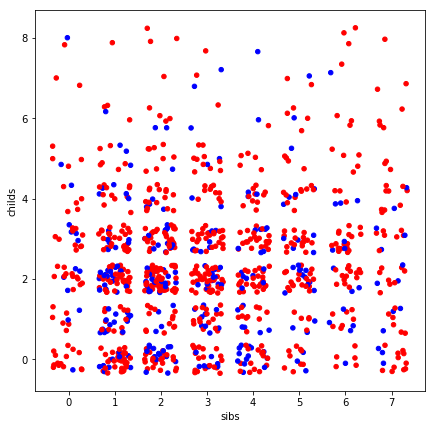

In [182]:
def make_plot(yr, ag):
    dfcs = dataf.query('childs<9 and 0<=sibs<8 and year=={} and age>{} and 0<spanking<8'.format(yr, ag))
    dfcsnoisy = dfcs  + np.random.uniform(-0.35, 0.35, (dfcs.shape))
    colors = {'1':'red', '2':'red', '3':'blue', '4':'blue'}
    sp_color = dfcs['spanking'].apply(lambda x : colors[str(x)])
    #print(sp_color)
    the_plot = dfcsnoisy.plot(kind='scatter', x='sibs', y='childs', figsize=(7,7), c=sp_color)
    return the_plot
yr16 = make_plot(2016, 39)
yr94 = make_plot(1994, 39)
print(yr94, yr16)

In [200]:
dataf.query("childs<9 and 0<=sibs<8 and 0<spanking<8")[['year','spanking','childs','sibs']].groupby('year').agg('mean')

,spanking,childs,sibs
year,,,
1994,2.102194,1.779446,2.932448
1996,2.118963,1.753828,2.921673
1998,2.090517,1.740148,2.943350
2000,2.031462,1.726095,2.957434
2002,2.055690,1.731235,2.841404
2004,2.103362,1.749689,2.815691
2006,2.096461,1.801941,2.914384
2008,2.070101,1.881757,2.941723
2010,2.152516,1.797170,2.933176


In [211]:
pro = (dataf.query("childs<9 and 0<=sibs<8 and 1<=spanking<=2")
     [['spanking','childs','sibs']]
    .groupby(['childs','sibs']).agg('count'))
anti = (dataf.query("childs<9 and 0<=sibs<8 and 3<=spanking<=4")
     [['spanking','childs','sibs']]
    .groupby(['childs','sibs']).agg('count'))
ratio = pro/(pro+anti)
ratio

spanking
childs sibs          
0      0     0.723926
       1     0.686893
       2     0.709626
       3     0.718676
       4     0.723519
       5     0.700326
       6     0.760181
       7     0.771605
1      0     0.647482
       1     0.657673
       2     0.695082
       3     0.688889
       4     0.725146
       5     0.707921
       6     0.702703
       7     0.744966
2      0     0.736041
       1     0.674365
       2     0.703125
       3     0.713764
       4     0.717277
       5     0.704600
       6     0.707483
       7     0.712329
3      0     0.761062
       1     0.718137
       2     0.723104
       3     0.727273
       4     0.722992
       5     0.750000
...               ...
5      2     0.756757
       3     0.728155
       4     0.763889
       5     0.779412
       6     0.684211
       7     0.810811
6      0     0.555556
       1     0.885714
       2     0.764706
       3     0.657895
       4     0.696970
       5     0.800000
       6     0.807692
       7     0.840000
7      0          NaN
       1     0.888889
       2     0.687500
       3     0.739130
       4     0.588235
       5     0.736842
       6     0.636364
       7     0.866667
8      0     0.818182
       1     0.818182
       2     0.764706
       3     0.857143
       4     0.631579
       5     0.578947
       6     0.750000
       7          NaN

[72 rows x 1 columns]

In [ ]:
def make_plot(yr, ag):
    dfcs = dataf.query('childs<9 and 0<=sibs<8 and year=={} and age>{} and 0<spanking<8'.format(yr, ag))
    dfcsnoisy = dfcs  + np.random.uniform(-0.35, 0.35, (dfcs.shape))
    colors = {'1':'red', '2':'red', '3':'blue', '4':'blue'}
    sp_color = dfcs['spanking'].apply(lambda x : colors[str(x)])
    #print(sp_color)
    the_plot = dfcsnoisy.plot(kind='scatter', x='sibs', y='childs', figsize=(7,7), c=sp_color)
    return the_plot
yr16 = make_plot(2016, 39)
yr94 = make_plot(1994, 39)
print(yr94, yr16)

       col1      col2
0 -1.584753 -0.475069
1 -1.956931  0.074553
2  0.705613  3.307500
3 -0.048477 -0.744863
4 -0.775105 -1.105080
5 -0.093016  0.186767
6  0.544445  0.056610
7  0.215880  1.152324
8 -1.047421  0.422720
9  0.726072 -0.469430


,col1,col2
0,-1.652779,-0.487873
1,-1.863875,0.057056
2,0.768845,3.329151
3,0.042759,-0.679804
4,-0.810871,-1.196963
5,-0.063813,0.094641
6,0.605979,0.129375
7,0.162639,1.243038
8,-1.134015,0.484810
9,0.800048,-0.468872


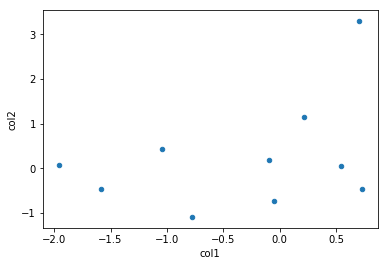

In [190]:
df = pd.DataFrame(np.random.randn(10,2), columns=['col1','col2'])
df.plot(kind='scatter', x='col1', y='col2')
df2 = df + np.random.uniform(-0.1, 0.1, (df.shape))
print(df)
df2